# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
weather_api_key = "b66506d86c28e3321e7e88b49d4983d5"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = 'london'
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#get weather data for London and convert reponse to json
response = requests.get(query_url + city)
weather_json = response.json()
# let's see the result
display(weather_json)


{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 55.87,
  'feels_like': 51.62,
  'temp_min': 54,
  'temp_max': 57.99,
  'pressure': 1021,
  'humidity': 62},
 'visibility': 10000,
 'wind': {'speed': 4.7, 'deg': 0},
 'clouds': {'all': 100},
 'dt': 1598823883,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1598764239,
  'sunset': 1598813513},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [4]:
city_weather = []



for city in cities:
    #gets response for each city
    
    response = requests.get(query_url + city).json()
    
    try:
        city_dict = {
            "city_name" : response["name"],
            "cloudiness" : response ["clouds"]["all"],
            "country" : response["sys"]["country"],
            "data" : response["dt"],
            "humidity" :response["main"]["humidity"],
            "lat" : response["coord"]["lat"],
            "lon" : response["coord"]["lon"],
            "max_temp" : response["main"]["temp_max"],
            "wind_speed" : response["wind"]["speed"]
        }
        city_weather.append(city_dict)
    
        print(f"city_name:{response['name']} of ID:{response['id']}")
    
    # Handle exceptions for a city that is not available in the API
    except:
        # Append null values
        print("City not found. Skipping...")


city_name:Iquique of ID:3887127
city_name:Nanortalik of ID:3421765
city_name:Punta Arenas of ID:3874787
city_name:Hithadhoo of ID:1282256
city_name:Bredasdorp of ID:1015776
city_name:Westport of ID:4845585
city_name:Provideniya of ID:4031574
city_name:Evensk of ID:2125693
city_name:Klyuchi of ID:1503153
city_name:Mar del Plata of ID:3430863
city_name:Bambous Virieux of ID:1106677
city_name:Rikitea of ID:4030556
city_name:Pincher Creek of ID:6104841
city_name:Hilo of ID:5855927
city_name:Hūn of ID:2216645
city_name:Ribeira Grande of ID:3372707
city_name:Nālūt of ID:2214432
city_name:Karema of ID:158321
city_name:Albany of ID:5106841
city_name:Aloleng of ID:1731298
city_name:Qaanaaq of ID:3831208
city_name:Cape Town of ID:3369157
city_name:Atuona of ID:4020109
city_name:San Vicente of ID:3428068
city_name:Magán of ID:6361748
city_name:Puerto Ayora of ID:3652764
city_name:Vaini of ID:4032243
city_name:Ampanihy of ID:1078553
city_name:Pevek of ID:2122090
city_name:Castro of ID:3466704
city

city_name:Dwārka of ID:1272140
city_name:Nouakchott of ID:2377450
city_name:Alta Floresta of ID:6316343
city_name:Kaeo of ID:2189343
city_name:Llangefni of ID:2644037
City not found. Skipping...
city_name:Porto Belo of ID:3452900
city_name:Staraya Kulatka of ID:489164
city_name:Zell am See of ID:2760634
city_name:Nelson Bay of ID:2155562
city_name:Cockburn Town of ID:3576994
city_name:Talnakh of ID:1490256
city_name:Inhambane of ID:1045114
city_name:Lahaina of ID:5849996
city_name:Ayagoz of ID:1525988
city_name:Tazovsky of ID:1489853
city_name:Nokaneng of ID:933211
city_name:Berlevåg of ID:780687
city_name:Dhidhdhoo of ID:1337612
city_name:Magdagachi of ID:2020591
city_name:Sunyani of ID:2295021
city_name:Lüderitz of ID:3355672
city_name:São João da Barra of ID:3448903
city_name:Along of ID:1278969
city_name:Ancud of ID:3899695
City not found. Skipping...
city_name:Pozo Colorado of ID:3437443
city_name:Klooga of ID:591306
city_name:Hasaki of ID:2112802
city_name:Motegi of ID:2111827
ci

city_name:Gizo Government Station of ID:2108857
city_name:Santa Isabel of ID:3450188
city_name:Zhangjiakou of ID:2033196
city_name:Sadovo of ID:727479
city_name:Guéret of ID:3014383
city_name:Mapiripán of ID:3792394
city_name:Show Low of ID:5314245
city_name:Sainte-Marie of ID:935255
city_name:Saint-Pierre of ID:935214
city_name:Lodwar of ID:189280
city_name:Milverton of ID:6074404
City not found. Skipping...
city_name:Taltal of ID:3870243
city_name:Coyhaique of ID:3894426
city_name:Haimen of ID:1809062
city_name:Constantine of ID:2501152
city_name:Florence of ID:3176959
city_name:Grindavik of ID:3416888
city_name:Kristinestad of ID:650769
City not found. Skipping...
city_name:La Montañita of ID:3678363
city_name:Les Cayes of ID:3728097
city_name:Saint-François of ID:2980080
city_name:São Félix do Xingu of ID:3388847
city_name:Camacha of ID:2270385
city_name:Ialibu of ID:2095925
city_name:Paita of ID:3694112
city_name:Anklam of ID:2956018
City not found. Skipping...
city_name:San André

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(city_weather)
weather_df.head()

,city_name,cloudiness,country,data,humidity,lat,lon,max_temp,wind_speed
0,Iquique,90,CL,1598824636,63,-20.22,-70.14,60.80,5.82
1,Nanortalik,99,GL,1598824637,80,60.14,-45.24,46.63,6.42
2,Punta Arenas,75,CL,1598824288,51,-53.15,-70.92,35.60,14.99
3,Hithadhoo,57,MV,1598824548,73,-0.60,73.08,82.11,10.02
4,Bredasdorp,16,ZA,1598824640,93,-34.53,20.04,41.00,8.05


In [6]:
weather_df.to_csv("weather_df.csv")
weather_df.describe()

,cloudiness,data,humidity,lat,lon,max_temp,wind_speed
count,550.000000,5.500000e+02,550.000000,550.000000,550.000000,550.000000,550.000000
mean,47.269091,1.598825e+09,70.060000,18.674182,17.271509,67.578727,8.096200
std,37.832826,1.419960e+02,20.875074,33.426435,91.728693,15.012542,5.584398
min,0.000000,1.598824e+09,1.000000,-54.800000,-175.200000,28.400000,0.380000
25%,6.250000,1.598825e+09,57.000000,-7.805000,-63.455000,53.627500,3.605000
50%,40.000000,1.598825e+09,75.000000,20.510000,18.005000,70.990000,6.930000
75%,88.000000,1.598825e+09,86.000000,47.245000,103.590000,79.750000,11.012500
max,100.000000,1.598825e+09,100.000000,78.220000,179.320000,102.000000,31.090000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humid = weather_df.loc[weather_df["humidity"]>100]
humid

,city_name,cloudiness,country,data,humidity,lat,lon,max_temp,wind_speed


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

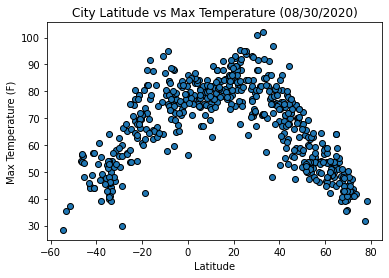

In [10]:
plt.scatter(weather_df["lat"],weather_df["max_temp"],edgecolor ="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (08/30/2020)")
plt.savefig("../WeatherPy/Output/Temperature (F) vs. Latitude.png")

Highest temperature is when Latitude is aroud 30

## Latitude vs. Humidity Plot

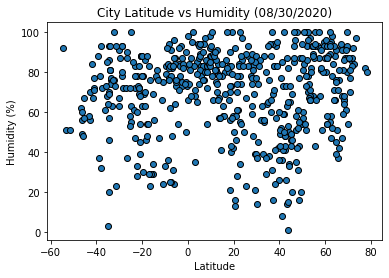

In [11]:
plt.scatter(weather_df["lat"],weather_df["humidity"],edgecolor ="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (08/30/2020)")
plt.savefig("../WeatherPy/Output/Humidity (%) vs. Latitude.png")

Humidity spreads across Latitude

## Latitude vs. Cloudiness Plot

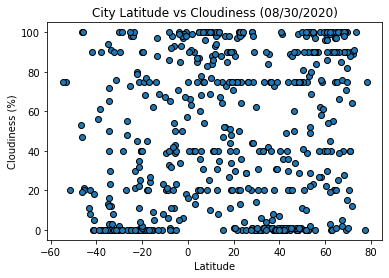

In [12]:
plt.scatter(weather_df["lat"],weather_df["cloudiness"],edgecolor ="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (08/30/2020)")
plt.savefig("../WeatherPy/Output/Cloudiness (%) vs. Latitude.png")

Cloudness is spread no matter what Latitude is

## Latitude vs. Wind Speed Plot

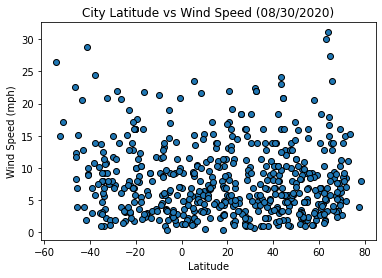

In [13]:
plt.scatter(weather_df["lat"],weather_df["wind_speed"],edgecolor ="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (08/30/2020)")
plt.savefig("../WeatherPy/Output/Wind Speed (mph) vs. Latitude.png")

Not a huge difference on Wind Speed across Latitude

## Plots for Linear Regression

### Create northen and sourthen hemisphere

In [14]:
north_hem = weather_df.loc[weather_df["lat"]>= 0]
south_hem = weather_df.loc[weather_df["lat"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6375122040044977


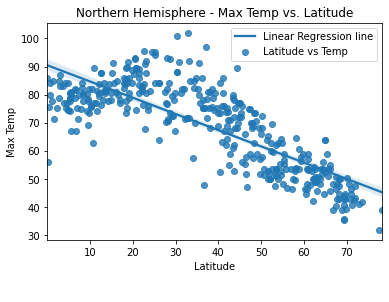

In [16]:
import seaborn as sb
x_values = north_hem["lat"]
y_values = north_hem["max_temp"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../WeatherPy/Output/Northern Hemisphere - Temperature (F) vs. Latitude.png")

Maximum temperature decreases as the number of Latitude goes higher

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6195046589263017


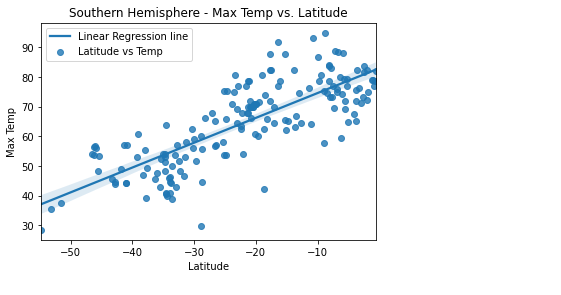

In [17]:
x_values = south_hem["lat"]
y_values = south_hem["max_temp"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../WeatherPy/Output/Southern Hemisphere - Temperature (F) vs. Latitude.png")

Maximum temperature increases as the number of Latitude goes higher

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00041368581490718227


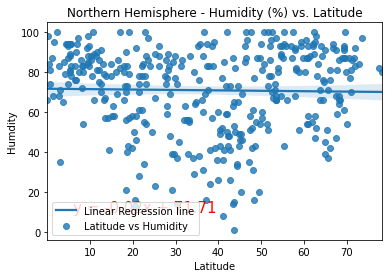

In [18]:
x_values = north_hem["lat"]
y_values = north_hem["humidity"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humdity")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.legend(labels=['Linear Regression line', 'Latitude vs Humidity'])
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../WeatherPy/Output/Northern Hemisphere - Humidity (%) vs. Latitude.png")

Humidity and Latitude does not have a relationship

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005751894414741089


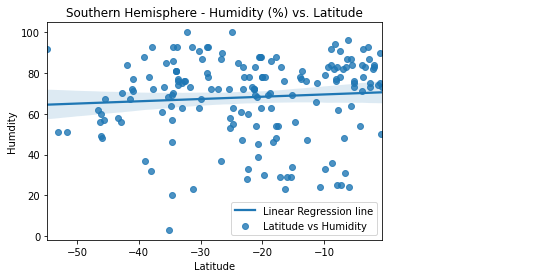

In [19]:
x_values = south_hem["lat"]
y_values = south_hem["humidity"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humdity")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.legend(labels=['Linear Regression line', 'Latitude vs Humidity'])
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../WeatherPy/Output/Southern Hemisphere - Humidity (%) vs. Latitude.png")

Humidity and Latitude does not have a relationship

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0018542679216925861


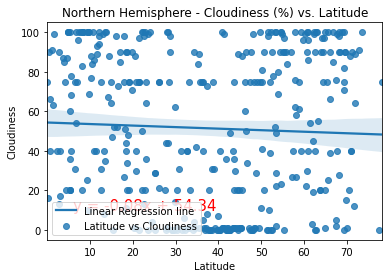

In [20]:
x_values = north_hem["lat"]
y_values = north_hem["cloudiness"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.legend(labels=['Linear Regression line', 'Latitude vs Cloudiness'])
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../WeatherPy/Output/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

Cloudness and Latitude does not have a relationship

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.031248008664536257


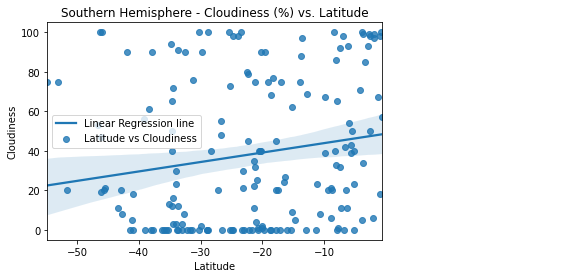

In [21]:
x_values = south_hem["lat"]
y_values = south_hem["cloudiness"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.legend(labels=['Linear Regression line', 'Latitude vs Cloudiness'])
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../WeatherPy/Output/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

Cloudness and Latitude does not have a strong relationship

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0048292243369701384


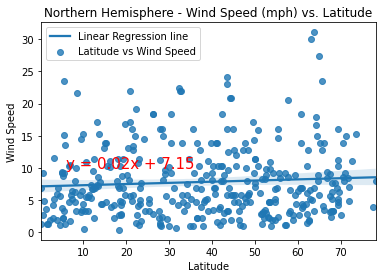

In [22]:
x_values = north_hem["lat"]
y_values = north_hem["wind_speed"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.legend(labels=['Linear Regression line', 'Latitude vs Wind Speed'])
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../WeatherPy/Output/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

Wind Speed and Latitude does not have a relationship

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = south_hem["lat"]
y_values = south_hem["wind_speed"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.legend(labels=['Linear Regression line', 'Latitude vs Wind Speed'])
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../WeatherPy/Output/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

Wind Speed and Latitude does not have a strong relationship

### Observation
1. Temperature gets higher as the number of Latitude gets smaller in the northern hemisphere
2. Temperature gets lower as the number of Latitude gets smaller in the southern hemisphere
3. There was not strong relationship between Humidity vs Latitude, Cloudness vs Latitude, and Wind Speed vs Latitude